In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/sim_lin_reg.csv')
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'PACKAGE')

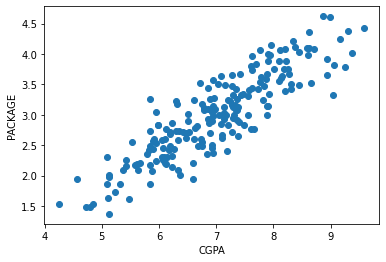

In [6]:
plt.scatter(data['cgpa'],data['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [7]:
X = data.drop('package',axis=1)
y = data['package']

## using *Scikit - Learn*

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'PACKAGE')

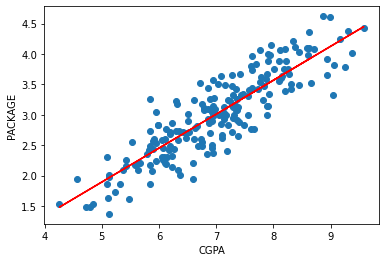

In [30]:
plt.scatter(data['cgpa'],data['package'])
plt.plot(X_train , lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('PACKAGE')

In [35]:
ycheck = lr.predict(X_test.iloc[0].values.reshape(1,1))
ycheck

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

In [37]:
#creating the equation y = m*x+b
slope = lr.coef_
intercept = lr.intercept_
ycheck2 = (slope * X_test.iloc[0].values.reshape(1,1)) + intercept
ycheck2

array([[3.89111601]])

In [38]:
y_pred = lr.predict(X_test)
print('R2 score == ',r2_score(y_test,y_pred))
print('Mean Absolute Error == ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error == ',mean_squared_error(y_test,y_pred))
print('Slope ',slope)
print('y_intercept',intercept)

R2 score ==  0.780730147510384
Mean Absolute Error ==  0.2884710931878175
Mean Squared Error ==  0.12129235313495527
Slope  [0.55795197]
y_intercept -0.8961119222429144


  ## using *formulation*

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
class MyMethod:
    
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num = num + ((X_train[i]-X_train.mean()) * (y_train[i]-y_train.mean()))
            den = den + ((X_train[i]-X_train.mean()) * (X_train[i]-X_train.mean()))
        self.m = num/den
        self.b = y_train.mean()-(self.m * X_train.mean())

    def predict(self, X_test):
        y_pred = (self.m * X_test) + self.b
        return y_pred

In [4]:
data = pd.read_csv('data/scr-dataset.csv')
data.head()

,x,y
0,1.0,1.750768
1,1.1,1.699704
2,1.2,1.607502
3,1.3,1.479060
4,1.4,1.320438


In [5]:
X = data.iloc[:,0:1].values
y = data.iloc[:,-1:].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
lr = MyMethod()

In [8]:
lr.fit(X_train,y_train)

In [9]:
preds = lr.predict(X_test)

In [13]:
print('R2 score == ',r2_score(y_test,preds))
print('Mean Absolute Error == ',mean_absolute_error(y_test,preds))
print('Mean Squared Error == ',mean_squared_error(y_test,preds))
print('Slope ',lr.m)
print('y_intercept',lr.b)

R2 score ==  -0.020496855494311683
Mean Absolute Error ==  0.7418964620975697
Mean Squared Error ==  0.8869597139321328
Slope  [-0.00046806]
y_intercept [-0.01649451]


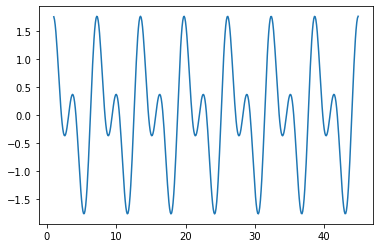

In [18]:
plt.plot(X,y)